#### Dataset

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.

Dataset accessed from: https://snap.stanford.edu/data/ego-Facebook.html

Citation: J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.

Files:

nodeId.edges : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

nodeId.circles : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

nodeId.feat : The features for each of the nodes that appears in the edge file.

nodeId.egofeat : The features for the ego user.

nodeId.featnames : The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

In [1]:
import networkx as nx
from ipysigma import Sigma
from pyvis.network import Network
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Some file handling functions

In [2]:
#Function for adding the ego user into edge files
def addEgoUserToEdge(filename):
    import os
    from pathlib import Path
    #Get the name of the ego user whose network we are loading
    ego=Path(filename).stem+" "
    with open(filename, 'r') as f:
        lines = f.readlines()
        f.close()
    #add ego user id at the beginning of each line
    lines = [ego+line for line in lines]
    with open(filename, 'w') as f:
        f.writelines(lines)
        f.close()

In [15]:
# Function for replacing characters - to be used for converting files to comma separated values
def FileContentSpaceReplace(filename,search_text,replace_text):
    import os
    from pathlib import Path
    # Opening our text file in read only 
    # mode using the open() function 
    with open(filename, 'r') as file: 
  
        # Reading the content of the file 
        # using the read() function and storing 
        # them in a new variable 
        data = file.read()
        file.close()
  
        # Searching and replacing the text 
        # using the replace() function 
        data = data.replace(search_text, replace_text) 
        data = 'Ego,OriginNode,DestNode\n' + data
        
    # Opening our text file in write only 
    # mode to write the replaced content 
    with open(filename, 'w') as file: 
  
        # Writing the replaced data in our 
        # text file 
        file.write(data)
        file.close()
  
    # Printing Text replaced 
    print("Text replaced") 

In [16]:
#Function for adding the ego user into all of the edge files and converting them into comma-separated values
def PrepFBFiles():
    import os
    from pathlib import Path
    directory="./"
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".edges"): 
            #addEgoUserToEdge(filename)
            FileContentSpaceReplace(filename," ",",")
            continue
        else:
            continue

### Calling the file handling routines to process the edge files and then load into a dataframe

In [17]:
PrepFBFiles()

Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced
Text replaced


In [2]:
#Read all the edge data into a Pandas dataframe
df=pd.read_csv('df_head.csv')
import os
from pathlib import Path
directory="./"
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".edges"): 
        #Get the name of the ego user whose network we are loading
        fpath=os.path.join(directory, filename)
        df_temp=pd.read_csv(fpath)
        df=pd.concat([df,df_temp])
        continue
    else:
        continue

In [3]:
df.describe()

,Ego,OriginNode,DestNode
count,170174,170174,170174
unique,10,3959,3959
top,1912,2543,2543
freq,60050,293,293


#### We have data for 10 unique egos (users whose network data we have imported), with data for 170174 edges (users following other users) with a total of 3959 nodes (users)

In [5]:
g=nx.from_pandas_edgelist(df, source='OriginNode', target='DestNode')
# check if the data has been read properly or not.
# count the number of nodes
# number of self-nodes
print('Number of nodes', len(g.nodes))
print('Number of edges', len(g.edges))
print('Average degree', sum(dict(g.degree).values()) / len(g.nodes))

Number of nodes 3959
Number of edges 84243
Average degree 42.55771659509977


#### The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

In [6]:
degree_centrality = nx.degree_centrality(g)
lst=[]
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    new_row=[f"{node}" ,f"{centrality:.3f}"]
    lst.append(new_row)

Degree Centrality:


In [8]:
df_deg_cen = pd.DataFrame(lst, columns=['node', 'centrality'])

In [9]:
df_deg_cen.head()

,node,centrality
0,236,0.009
1,186,0.011
2,122,0.016
3,285,0.012
4,24,0.004


In [12]:
df_deg_cen.dtypes

node          object
centrality    object
dtype: object

In [13]:
df_deg_cen["centrality"] = pd.to_numeric(df_deg_cen["centrality"])
df_deg_cen["node"] = pd.to_numeric(df_deg_cen["node"])

In [14]:
df_deg_cen.sort_values(by='centrality', ascending=False)

,node,centrality
2216,2543,0.074
2248,2347,0.073
709,1888,0.064
627,1800,0.062
551,1663,0.059
...,...,...
1310,1233,0.000
2098,3125,0.000
322,241,0.000
3755,648,0.000


<Axes: >

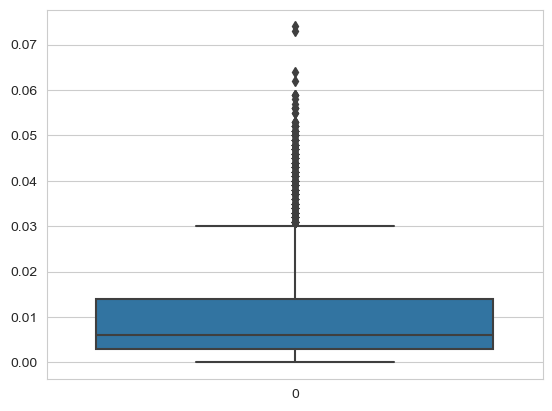

In [15]:
sns.set_style("whitegrid") 
  
sns.boxplot([df_deg_cen.centrality])

C:\Users\Prad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


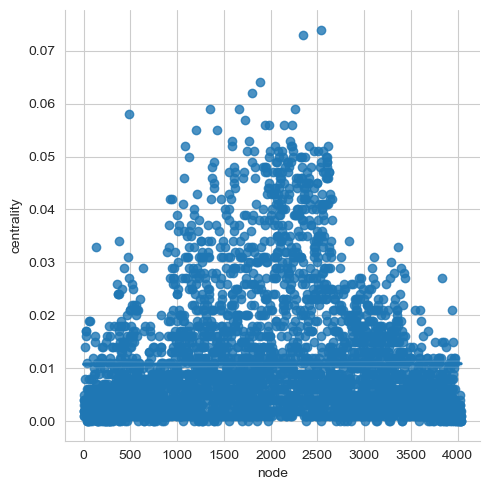

In [17]:
sns.lmplot(data=df_deg_cen,x='node', y='centrality')

##### The Louvain method is an algorithm to detect communities in large networks. It maximizes a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities. This means evaluating how much more densely connected the nodes within a community are, compared to how connected they would be in a random network.

##### The Louvain algorithm is a hierarchical clustering algorithm, that recursively merges communities into a single node and executes the modularity clustering on the condensed graphs.

In [18]:
communities_lv = list(nx.community.louvain_communities(g))

C:\Users\Prad\AppData\Local\Temp\ipykernel_10080\2883208717.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


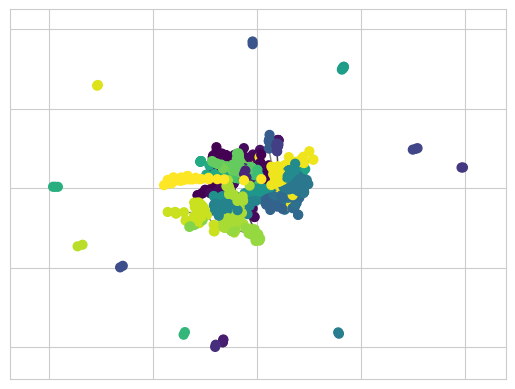

In [19]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community_louvain.best_partition(g)

# draw the graph
pos = nx.spring_layout(g)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

#### This visualisation shows the natural communities within the data based on purely the edge data. It does not take into account the additional characteristics of nodes (persons) such as educational or work data which influences communities which people belong to.

#### The overlapping nature of the communities reflects the fact that people are frequently part of multiple communities.

### In the next version of this project I plan to take up link prediction, i.e., predicting missing links between nodes in a graph, crucial for knowledge graph completion (e.g., anticipating relationships in a social network).